### Treat all variables as Categorical

### Run Random Forest

### Find Important Variables

In [1]:
import numpy as np
import pandas as pd

In [6]:
customer_data = pd.read_csv('BlackFriday.csv')

In [7]:
customer_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


#### Dropping Null Columns as they have more than 5% missing values.

In [8]:
customer_data = customer_data.drop(columns=['Product_Category_2', 'Product_Category_3'], axis=1)

In [9]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 10 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Purchase                      537577 non-null int64
dtypes: int64(5), object(5)
memory usage: 41.0+ MB


In [192]:
customer = customer_data.copy()

In [193]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 10 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Purchase                      537577 non-null int64
dtypes: int64(5), object(5)
memory usage: 41.0+ MB


In [116]:
customer.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


## Feature Transformation

In [194]:
customer['User_ID'] = customer['User_ID'].astype('str', copy=False)
customer['Occupation'] = customer['Occupation'].astype('category', copy=False)
customer['Marital_Status'] =  customer['Marital_Status'].map({0 : 'UnMarried', 1: 'Married'})
customer['Product_Category_1'] = customer['Product_Category_1'].astype('category', copy=False)

In [195]:
customer.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,UnMarried,3,8370
1,1000001,P00248942,F,0-17,10,A,2,UnMarried,1,15200
2,1000001,P00087842,F,0-17,10,A,2,UnMarried,12,1422
3,1000001,P00085442,F,0-17,10,A,2,UnMarried,12,1057
4,1000002,P00285442,M,55+,16,C,4+,UnMarried,8,7969


In [196]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 10 columns):
User_ID                       537577 non-null object
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null category
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null object
Product_Category_1            537577 non-null category
Purchase                      537577 non-null int64
dtypes: category(2), int64(1), object(7)
memory usage: 33.8+ MB


## Multilabeling(if required)

In [123]:
from sklearn.preprocessing import MultiLabelBinarizer

user_id = customer.User_ID.unique()

product_id = customer.Product_ID.unique()

mlb_user = MultiLabelBinarizer(classes= user_id)
mlb_product = MultiLabelBinarizer(classes= product_id)

testuser = mlb_user.fit_transform(customer.User_ID)
testproduct = mlb_product.fit_transform(customer.Product_ID)

# Average Value kaise nikale

In [184]:
## new df which contains Avg value for the column value
Product_ID_avg = customer.pivot_table(index='Product_ID', values="Purchase", aggfunc=np.mean)

## Change the name of the column
Product_ID_avg['AvgPurchase'] = Product_ID_avg['Purchase']

# Drop the Purchase column
Product_ID_avg.drop(columns='Purchase', inplace=True, axis=1)

## Testing for Index values
Product_ID_avg[Product_ID_avg.index == 'P00285842'] 

# Main dataset ka index vo column kardo jispe join karna hai
customer.index = customer.Product_ID

# Join based on the Column
customer = customer.join(Product_ID_avg, on='Product_ID' )

C:\Users\IQbal\Anaconda3\lib\site-packages\pandas\core\frame.py:6336: FutureWarning: 'Product_ID' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  rsuffix=rsuffix, sort=sort)


In [185]:
customer = customer.drop(columns=['AvgPurchase'], inplace=False, axis=1)

# Frequency Count for each Category

In [197]:
# feature representing the count of each user
def getCountVar(compute_df, count_df, var_name):
    grouped_df = count_df.groupby(var_name)
    count_dict = {}
    for name, group in grouped_df:
        count_dict[name] = group.shape[0]

    count_list = []
    for index, row in compute_df.iterrows():
        name = row[var_name]
        count_list.append(count_dict.get(name, 0))
    return count_list

In [230]:
customer.tail()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,ID_Counts,Product_ID_Counts,Age_Counts,Occupation_Counts,City_Category_Counts,Stay_In_Current_City_Years_Counts,Marital_Status_Years_Counts,Product_Category_1_Counts
537572,M,36-45,16,C,1,UnMarried,1,11664,63,606,107499,24790,166446,189192,317817,138353
537573,M,36-45,16,C,1,UnMarried,1,19196,63,1004,107499,24790,166446,189192,317817,138353
537574,M,36-45,16,C,1,UnMarried,8,8043,63,136,107499,24790,166446,189192,317817,112132
537575,M,36-45,16,C,1,UnMarried,5,7172,63,524,107499,24790,166446,189192,317817,148592
537576,M,36-45,16,C,1,UnMarried,5,6875,63,82,107499,24790,166446,189192,317817,148592


In [199]:
# If done averaging then reset the index
customer.index = np.arange(len(customer))

In [201]:
customer['ID_Counts'] = getCountVar(customer, customer, 'User_ID')
customer['Product_ID_Counts'] = getCountVar(customer, customer, 'Product_ID')
customer['Age_Counts'] = getCountVar(customer, customer, 'Age')
customer['Occupation_Counts'] = getCountVar(customer, customer, 'Occupation')
customer['City_Category_Counts'] = getCountVar(customer, customer, 'City_Category')
customer['Stay_In_Current_City_Years_Counts'] = getCountVar(customer, customer, 'Stay_In_Current_City_Years')
customer['Marital_Status_Years_Counts'] = getCountVar(customer, customer, 'Marital_Status')
customer['Product_Category_1_Counts'] = getCountVar(customer, customer, 'Product_Category_1')

In [206]:
# Setting all the categorical columns to type category
for col in set(customer.columns) - set(customer.describe().columns):
    customer[col] = customer[col].astype('category')
    

print(customer.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537577 entries, 0 to 537576
Data columns (total 18 columns):
User_ID                              537577 non-null category
Product_ID                           537577 non-null category
Gender                               537577 non-null category
Age                                  537577 non-null category
Occupation                           537577 non-null category
City_Category                        537577 non-null category
Stay_In_Current_City_Years           537577 non-null category
Marital_Status                       537577 non-null category
Product_Category_1                   537577 non-null category
Purchase                             537577 non-null int64
ID_Counts                            537577 non-null int64
Product_ID_Counts                    537577 non-null int64
Age_Counts                           537577 non-null int64
Occupation_Counts                    537577 non-null int64
City_Category_Counts                

In [227]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
# Suppress an annoying but harmless warning
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import label_binarize

In [209]:
customer = customer.drop(columns=['User_ID', 'Product_ID'], inplace=False, axis=1)

In [211]:
customer.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Purchase', 'ID_Counts', 'Product_ID_Counts', 'Age_Counts',
       'Occupation_Counts', 'City_Category_Counts',
       'Stay_In_Current_City_Years_Counts', 'Marital_Status_Years_Counts',
       'Product_Category_1_Counts'],
      dtype='object')

##### Model Preparation

In [212]:
x = customer[['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1','ID_Counts', 'Product_ID_Counts', 'Age_Counts',
       'Occupation_Counts', 'City_Category_Counts',
       'Stay_In_Current_City_Years_Counts', 'Marital_Status_Years_Counts',
       'Product_Category_1_Counts']].copy()
y = customer['Purchase'].copy()

In [215]:
x_features = list(x.columns)
x_features

['Gender',
 'Age',
 'Occupation',
 'City_Category',
 'Stay_In_Current_City_Years',
 'Marital_Status',
 'Product_Category_1',
 'ID_Counts',
 'Product_ID_Counts',
 'Age_Counts',
 'Occupation_Counts',
 'City_Category_Counts',
 'Stay_In_Current_City_Years_Counts',
 'Marital_Status_Years_Counts',
 'Product_Category_1_Counts']

In [216]:
customer_polychot = pd.get_dummies(x[x_features], drop_first=True)
customer_polychot.head(2)

,ID_Counts,Product_ID_Counts,Age_Counts,Occupation_Counts,City_Category_Counts,Stay_In_Current_City_Years_Counts,Marital_Status_Years_Counts,Product_Category_1_Counts,Gender_M,Age_18-25,...,Product_Category_1_9,Product_Category_1_10,Product_Category_1_11,Product_Category_1_12,Product_Category_1_13,Product_Category_1_14,Product_Category_1_15,Product_Category_1_16,Product_Category_1_17,Product_Category_1_18
0,34,221,14707,12623,144638,99459,317817,19849,0,0,...,0,0,0,0,0,0,0,0,0,0
1,34,570,14707,12623,144638,99459,317817,138353,0,0,...,0,0,0,0,0,0,0,0,0,0


In [218]:
x_train, x_test, y_train, y_test = train_test_split(customer_polychot, y, test_size=0.2, random_state= 666)

In [219]:
rfreg = RandomForestRegressor(n_estimators=100)

In [220]:
rfmodel = rfreg.fit(x_train, y_train)

In [226]:
rfmodel.score(x_test,y_test)

0.6873727169662022

In [228]:
y_pred = rfmodel.predict(x_test)

In [229]:
mean_absolute_error(y_test, y_pred)

2059.2018203764515

In [221]:
indices = np.argsort(rfmodel.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(x_train.shape[1]):
  feature_rank.loc[f] = [f+1,
                         x_train.columns[indices[f]],
                         rfmodel.feature_importances_[indices[f]]]

In [222]:
import seaborn as sns
sns.barplot( y = 'feature', x = 'importance', data = feature_rank )

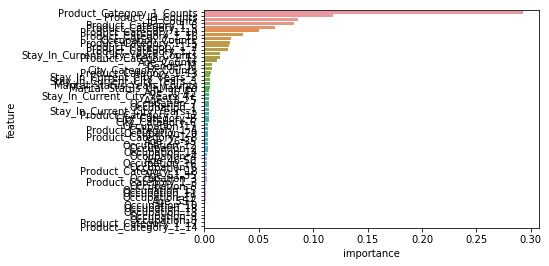

In [232]:
## Top 20
top = feature_rank[feature_rank['rank'] < len(x_train.columns)]
sns.barplot( y = 'feature', x = 'importance', data = top )

In [233]:
top

,rank,feature,importance
0,1,Product_Category_1_Counts,0.292920
1,2,Product_ID_Counts,0.117922
2,3,ID_Counts,0.086227
3,4,Product_Category_1_6,0.082116
4,5,Product_Category_1_5,0.065344
5,6,Product_Category_1_10,0.050178
6,7,Product_Category_1_16,0.035596
7,8,Occupation_Counts,0.024781
8,9,Product_Category_1_15,0.023983
9,10,Product_Category_1_2,0.022802


In [ ]:
## Adding Average Value for each column